In [1]:
import fastf1 as ff1
import matplotlib.pyplot as plt

req         WARNING 	DEFAULT CACHE ENABLED! (1.08 GB) C:\Users\calin\AppData\Local\Temp\fastf1
events      WARNING 	Correcting user input 'Montecarlo' to 'Canadian Grand Prix'
core           INFO 	Loading data for Canadian Grand Prix - Race [v3.4.4]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached dat

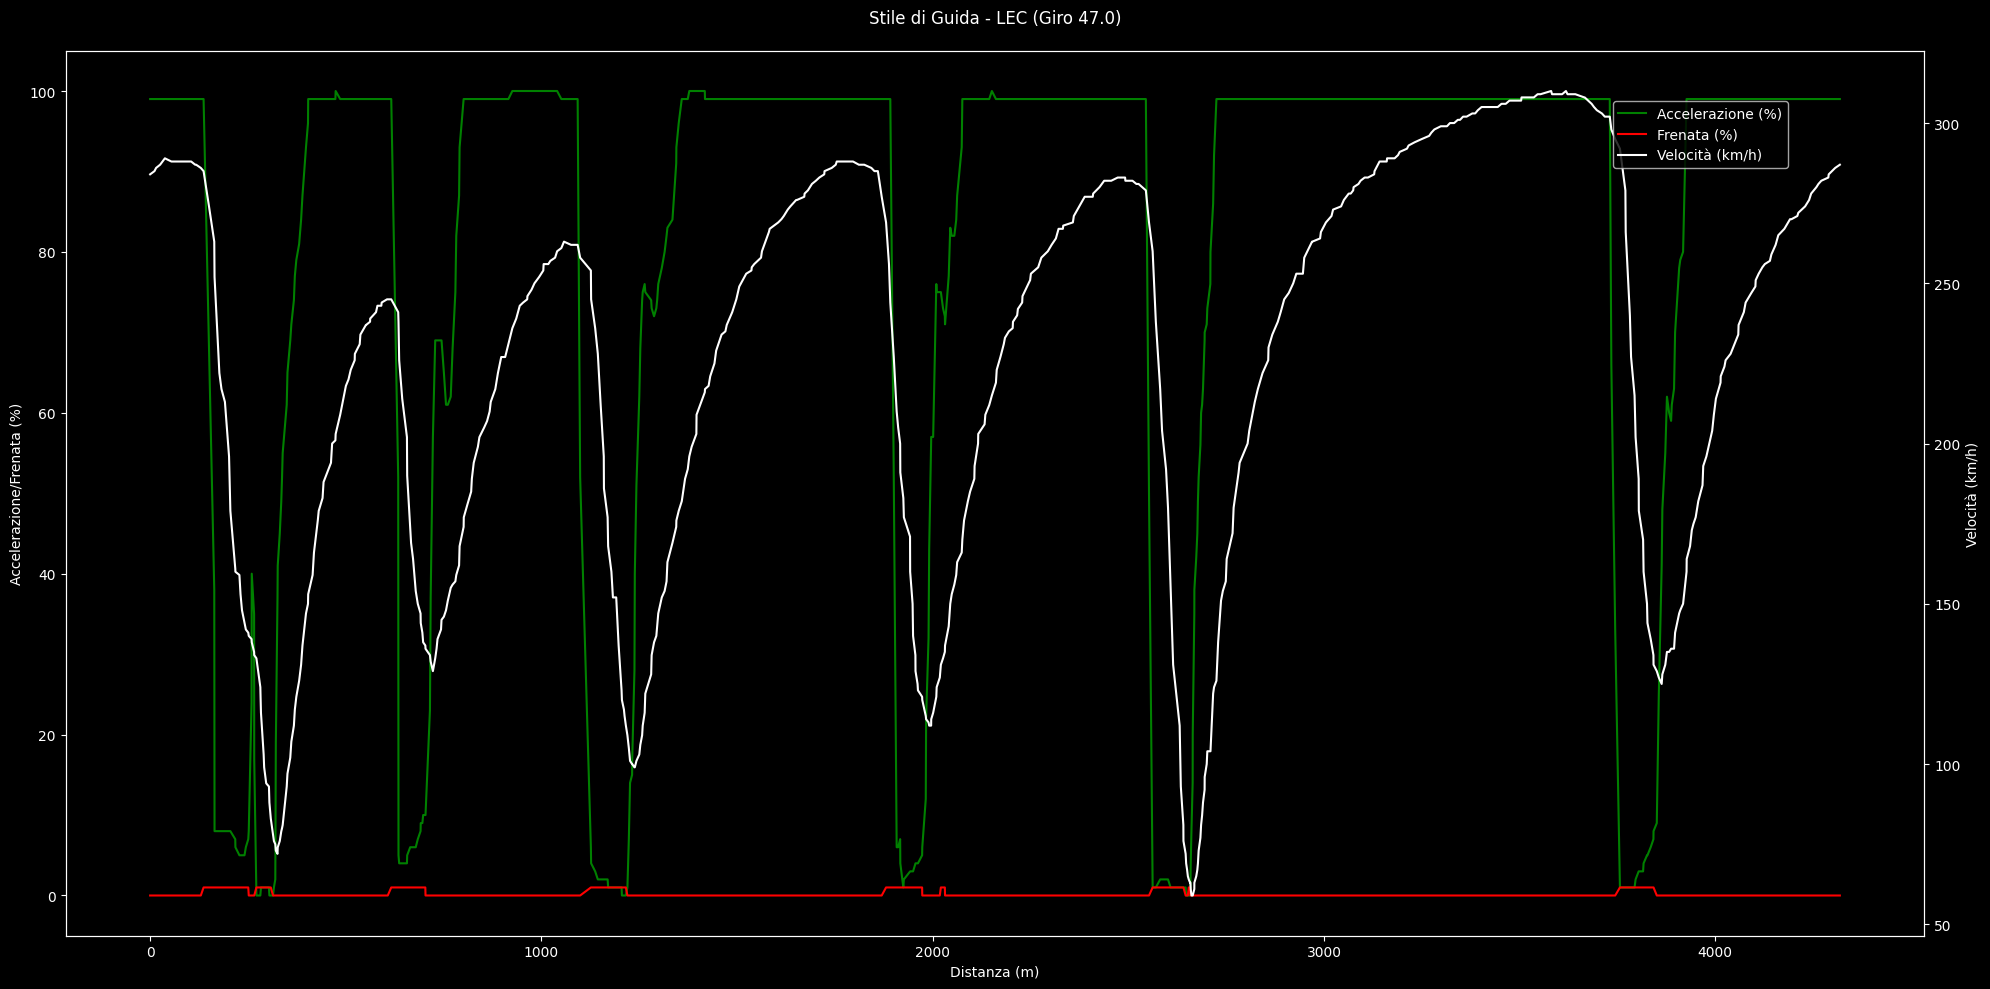

In [2]:
# Carica i dati della sessione
session = ff1.get_session(2023, 'Montecarlo', 'R')  # Anno, Circuito, Tipo di sessione (R = Gara)
session.load()

# Seleziona il pilota (es. Lewis Hamilton, vettura 44)
driver_code = 'LEC'  # Codice pilota (es. HAM per Hamilton)
driver_laps = session.laps.pick_driver(driver_code)

# Seleziona un giro specifico (es. il giro più veloce)
fastest_lap = driver_laps.pick_fastest()
telemetry = fastest_lap.get_telemetry()

# Estrai i dati di telemetria
throttle = telemetry['Throttle']  # Accelerazione (0-100%)
brake = telemetry['Brake']  # Frenata (0-100%)
speed = telemetry['Speed']  # Velocità (km/h)
distance = telemetry['Distance']  # Distanza percorsa durante il giro

# Crea il grafico con sfondo nero
plt.style.use('dark_background')  # Imposta lo sfondo nero
fig, ax = plt.subplots(figsize=(20,10))

# Grafico dell'accelerazione
ax.plot(distance, throttle, color='green', label='Accelerazione (%)')

# Grafico della frenata
ax.plot(distance, brake, color='red', label='Frenata (%)')

# Grafico della velocità (sull'asse secondario)
ax2 = ax.twinx()
ax2.plot(distance, speed, color='white', label='Velocità (km/h)')
ax2.set_ylabel('Velocità (km/h)', color='white')
ax2.tick_params(axis='y', labelcolor='white')

# Aggiungi titolo e legenda
ax.set_xlabel('Distanza (m)')
ax.set_ylabel('Accelerazione/Frenata (%)', color='white')
ax.tick_params(axis='y', labelcolor='white')
plt.title(f"Stile di Guida - {driver_code} (Giro {fastest_lap['LapNumber']})", pad=20)
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))

# Mostra il grafico
plt.tight_layout()
plt.show()

In [3]:
driver_laps.shape

(70, 31)

In [4]:
print(telemetry.columns)

Index(['Date', 'SessionTime', 'DriverAhead', 'DistanceToDriverAhead', 'Time',
       'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source',
       'Distance', 'RelativeDistance', 'Status', 'X', 'Y', 'Z'],
      dtype='object')


core           INFO 	Loading data for Miami Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '63', '55', '44', '16', '10', '31', '20', '22', '18', '77', '23', '27', '24', '4', '21', '81', '2']
c:\Users\calin\OneDrive\Desktop\Develhope\fasftF1\.venv\lib\sit

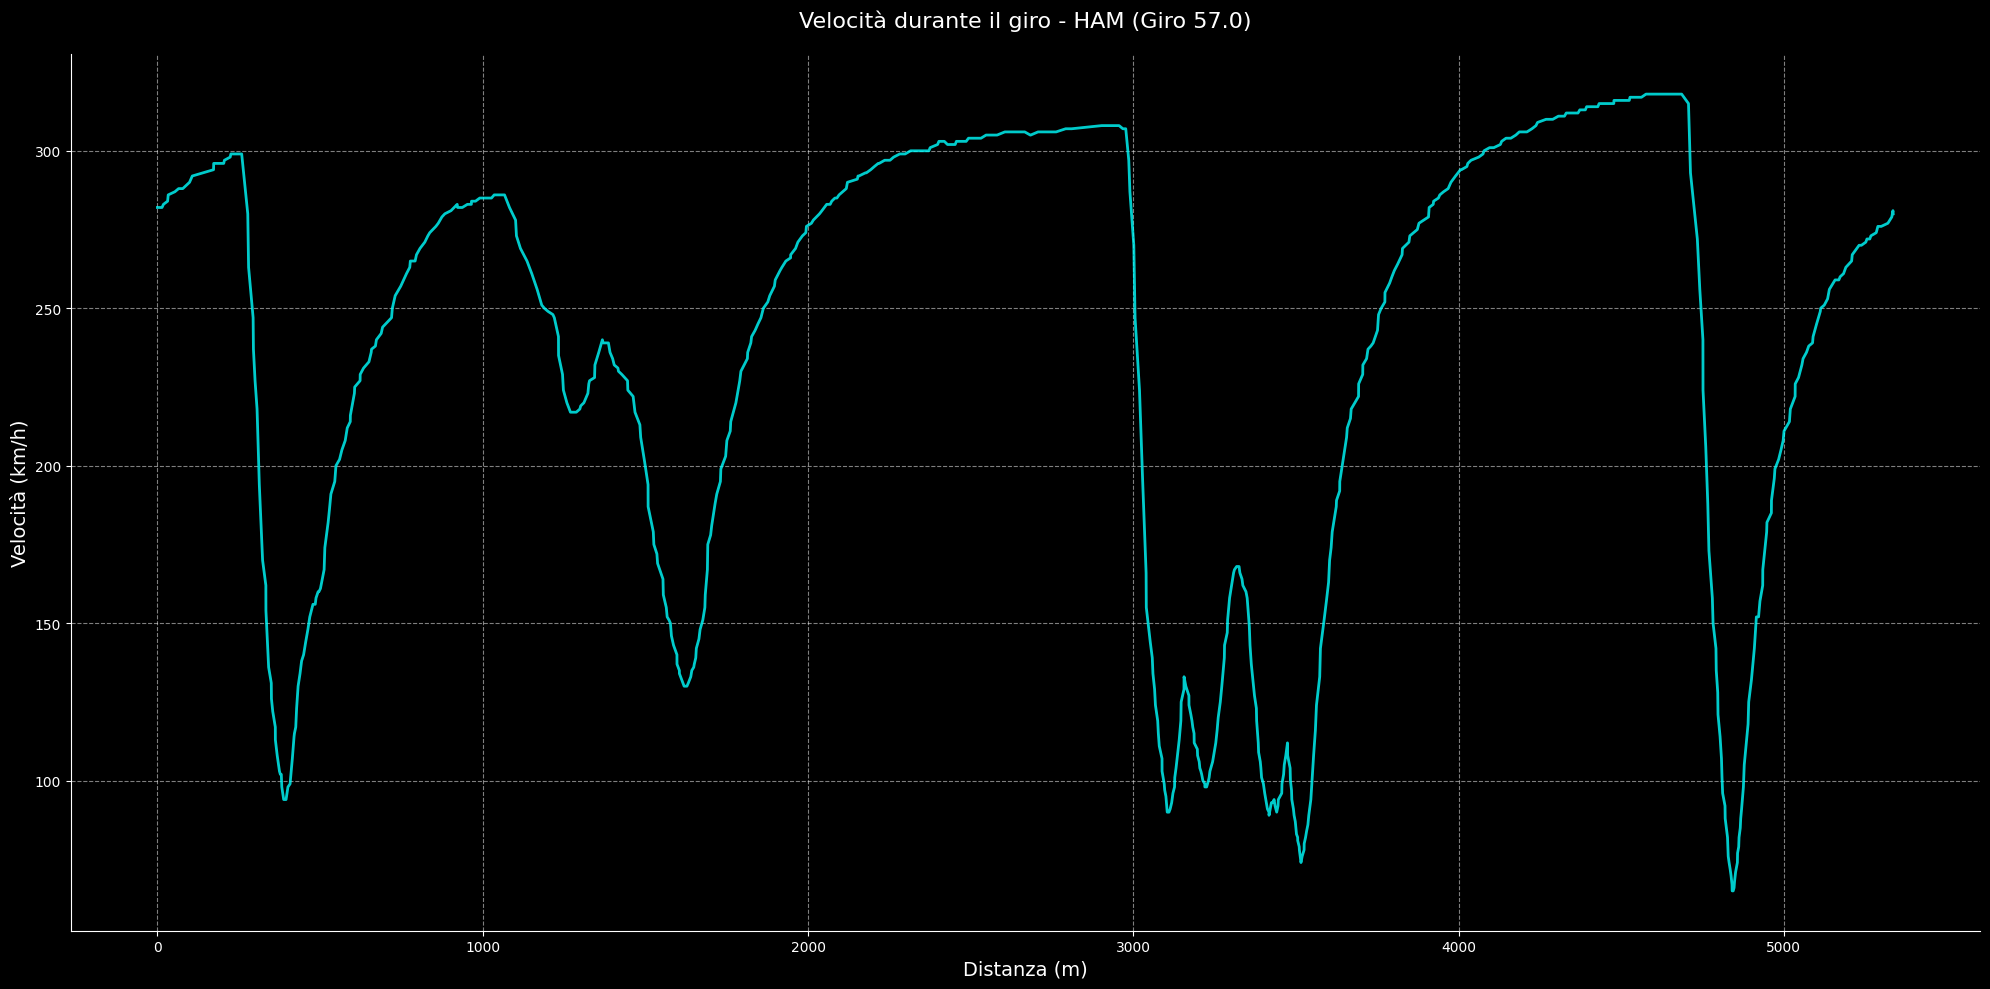

In [5]:
# Carica i dati della sessione
session = ff1.get_session(2023, 'Miami', 'R')  # Anno, Circuito, Tipo di sessione (R = Gara)
session.load()

# Seleziona il pilota (es. Lewis Hamilton, vettura 44)
driver_code = 'HAM'  # Codice pilota (es. HAM per Hamilton)
driver_laps = session.laps.pick_driver(driver_code)

# Seleziona un giro specifico (es. il giro più veloce)
fastest_lap = driver_laps.pick_fastest()
telemetry = fastest_lap.get_telemetry()

# Estrai i dati di telemetria
speed = telemetry['Speed']  # Velocità (km/h)
distance = telemetry['Distance']  # Distanza percorsa durante il giro

# Crea il grafico con sfondo nero
plt.style.use('dark_background')  # Imposta lo sfondo nero
fig, ax = plt.subplots(figsize=(20, 10))

# Grafico a onde della velocità
ax.plot(distance, speed, color='cyan', label='Velocità (km/h)', linewidth=2, alpha=0.8)

# Aggiungi titolo e legenda
ax.set_xlabel('Distanza (m)', fontsize=14, color='white')
ax.set_ylabel('Velocità (km/h)', fontsize=14, color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.title(f"Velocità durante il giro - {driver_code} (Giro {fastest_lap['LapNumber']})", fontsize=16, pad=20, color='white')

# Migliora la leggibilità del grafico
ax.grid(True, linestyle='--', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Mostra il grafico
plt.tight_layout()
plt.show()